# Unsupervised Learning Final Assignment DS3

#### Author : M.S. Hossain, Master student Data Science for Life Sciences.
#### University : Hanze University of Applied Sciences, Gorningen, Netherlands
#### Student number: 436908
#### Course Teacher : Fenna Feenstra, Hanze University of Applied Sciences

#### Background information
This dataset contains coordinates from markers of skull features from different species of primates. Utilizing unsupervised learning techniques, I tried to find which technique is best for clustering according to species

#### Loading essential Libraries

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN,MeanShift,AgglomerativeClustering,estimate_bandwidth 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn import metrics
from itertools import cycle
import plotly.graph_objs as go
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

### Data Preparation, Exploration and Analysis

In [2]:
df = pd.read_csv('primates_morphology.csv')

In [3]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
0,37773,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,...,-0.301822,-0.433051,0.037651,-0.279618,-0.421040,Ph,Presbytis,hosei,U,A
1,37772,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,...,0.215340,-0.299550,0.709472,0.876382,-0.150133,Ph,Presbytis,hosei,F,A
2,22276,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,...,-0.481468,-0.243025,-0.537644,-0.140292,0.082158,Pr,Presbytis,rubicunda,U,A
3,37776,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,...,0.586941,-0.043639,-0.518699,-1.051100,0.542354,Pr,Presbytis,rubicunda,M,A
4,37777,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,...,0.653851,0.718319,0.798722,-0.396749,0.844772,Pr,Presbytis,rubicunda,F,A


In [4]:
df.tail()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
160,41421,-91.085462,-46.160638,86.488654,16.969797,8.581993,-8.889106,3.806365,-2.572926,-1.852834,...,0.360452,0.513323,0.043604,0.294724,-0.003514,Hl,Hylobates,lar,F,A
161,41416,-91.489354,-39.614165,87.430951,20.871706,11.444575,-6.707486,1.910320,-5.616304,-3.878495,...,-0.368755,-0.173323,-0.627292,0.092090,0.444992,Hl,Hylobates,lar,F,A
162,41414,-90.204104,-40.985982,83.286250,19.714259,10.448984,-10.269775,4.749293,-2.725633,-1.577457,...,-0.033229,0.434486,-0.158110,-0.416191,0.160474,Hl,Hylobates,lar,F,A
163,41412,-90.248202,-50.111180,77.285086,19.578454,5.634918,-13.863556,1.840409,-0.507864,-1.227452,...,0.125275,-0.018511,0.080169,-0.235063,0.317110,Hl,Hylobates,lar,F,A
164,41411,-88.663448,-43.835382,74.681197,19.086880,9.755993,-9.499983,2.948722,-2.992005,-0.666312,...,0.141954,-0.947492,0.060862,-0.297479,0.723835,Hl,Hylobates,lar,F,A


In [5]:
## dropping Unnamed:0 column
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
0,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,0.216411,...,-0.301822,-0.433051,0.037651,-0.279618,-0.421040,Ph,Presbytis,hosei,U,A
1,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,-1.451953,...,0.215340,-0.299550,0.709472,0.876382,-0.150133,Ph,Presbytis,hosei,F,A
2,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,0.601120,...,-0.481468,-0.243025,-0.537644,-0.140292,0.082158,Pr,Presbytis,rubicunda,U,A
3,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,-2.706925,...,0.586941,-0.043639,-0.518699,-1.051100,0.542354,Pr,Presbytis,rubicunda,M,A
4,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,-2.626544,...,0.653851,0.718319,0.798722,-0.396749,0.844772,Pr,Presbytis,rubicunda,F,A


In [6]:
profile = ProfileReport(df, minimal=True)
profile.to_file("df4.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
print("Shape before checking and removing any missing value:", df.shape)

Shape before checking and removing any missing value: (165, 35)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   0             165 non-null    float64
 1   1             165 non-null    float64
 2   2             165 non-null    float64
 3   3             165 non-null    float64
 4   4             165 non-null    float64
 5   5             165 non-null    float64
 6   6             165 non-null    float64
 7   7             165 non-null    float64
 8   8             165 non-null    float64
 9   9             165 non-null    float64
 10  10            165 non-null    float64
 11  11            165 non-null    float64
 12  12            165 non-null    float64
 13  13            165 non-null    float64
 14  14            165 non-null    float64
 15  15            165 non-null    float64
 16  16            165 non-null    float64
 17  17            165 non-null    float64
 18  18            165 non-null    

In this dataset there are 34 columns, where 0 to 29 are numeric and remaing columns (Abbreviation, Genus, Species, Sex and Age) are object which seems to be labels.

In [9]:
print('There are {:.1f} missing values in this dataframe'.format(df.isna().sum().sum()))

There are 0.0 missing values in this dataframe


As there is no missing value, so no action has to be taken.

In [10]:
# Display a description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,165.0,5.537129,99.061556,-201.591249,-58.767559,-4.994670,89.480991,192.170450
1,165.0,1.196007,69.971050,-111.659165,-44.542377,18.343281,42.633134,433.444316
2,165.0,-0.125596,56.627559,-114.986835,-45.981261,-2.090244,32.805157,142.161119
3,165.0,0.774423,18.591984,-54.636918,-12.328664,4.082730,16.969797,33.486208
4,165.0,-0.161111,11.336600,-19.375303,-7.348686,-2.158090,3.716401,68.005131
5,165.0,-0.182550,8.710069,-24.431319,-5.823589,-1.071286,5.078963,21.570367
6,165.0,-0.077955,5.463093,-54.611282,-1.389680,-0.124301,1.575336,18.598186
7,165.0,0.180683,5.214248,-20.855026,-2.572926,-0.379776,3.017432,20.232449
8,165.0,0.132617,4.520787,-18.487708,-2.279476,-0.057433,3.199454,18.859660
9,165.0,-0.030271,3.389125,-13.764311,-1.834020,-0.158941,1.722897,11.154277


In [11]:
#checking the number of Species
print(len(df['Species'].value_counts()))
df['Species'].value_counts()

25


cristata        18
lar             18
polykomos       10
mitis           10
badius          10
troglodytes      9
larvatus         9
anubis           9
torquatus        9
fascicularis     8
rubicunda        8
gorilla          6
albigena         6
talapoin         5
hosei            5
leucophaeus      4
patas            4
mulatta          3
paniscus         3
fuscata          2
sphinx           2
sylvanus         2
syndactylus      2
pygmaeus         2
gelada           1
Name: Species, dtype: int64

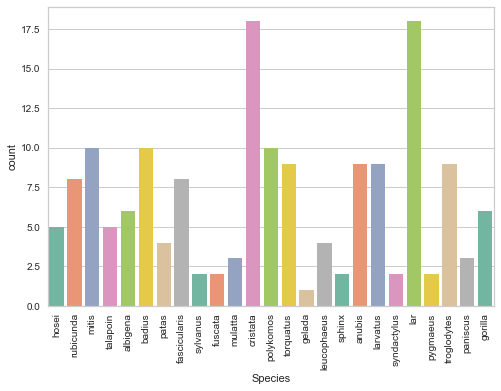

In [12]:
y = df['Species']
sns.countplot(x=y, label='Count', palette="Set2")
plt.xticks(rotation=90)
plt.show()

There are 25 different species in total and only species are important here. Species labels will allow the model to properly determine the species of the sample. So, i'm dropping these four columns: Abbreviation, Genus, Sex, Age

Genus, Abbreviation and Species are things that can be predicted and can be used as labels later to check the model accuracy. Sex and Age do not contribute to becoming a different species, thus these will also be dropped.

In [13]:
# Separate labels and values
df_coordinates = df.drop(['Abbreviation', 'Genus', 'Species', 'Sex', 'Age'], axis=1)
df_labels = df['Species']

In [14]:
df_coordinates

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,0.216411,...,-0.697783,-0.406979,0.607499,-1.309488,1.555190,-0.301822,-0.433051,0.037651,-0.279618,-0.421040
1,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,-1.451953,...,-0.105124,-0.569739,0.669346,-0.805954,1.583042,0.215340,-0.299550,0.709472,0.876382,-0.150133
2,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,0.601120,...,-0.546710,1.715016,1.269193,-0.397373,-0.813108,-0.481468,-0.243025,-0.537644,-0.140292,0.082158
3,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,-2.706925,...,-0.025537,0.972070,-0.066568,0.001964,0.656327,0.586941,-0.043639,-0.518699,-1.051100,0.542354
4,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,-2.626544,...,0.327166,-0.174675,0.368314,-0.700708,-0.450873,0.653851,0.718319,0.798722,-0.396749,0.844772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,-91.085462,-46.160638,86.488654,16.969797,8.581993,-8.889106,3.806365,-2.572926,-1.852834,-0.197013,...,1.064458,1.526719,-1.573739,-0.523507,0.069268,0.360452,0.513323,0.043604,0.294724,-0.003514
161,-91.489354,-39.614165,87.430951,20.871706,11.444575,-6.707486,1.910320,-5.616304,-3.878495,-0.037360,...,-2.074445,-0.037273,-0.110737,0.018629,0.913451,-0.368755,-0.173323,-0.627292,0.092090,0.444992
162,-90.204104,-40.985982,83.286250,19.714259,10.448984,-10.269775,4.749293,-2.725633,-1.577457,2.706787,...,0.687204,1.546473,-2.072265,-0.240351,-0.184852,-0.033229,0.434486,-0.158110,-0.416191,0.160474
163,-90.248202,-50.111180,77.285086,19.578454,5.634918,-13.863556,1.840409,-0.507864,-1.227452,0.595468,...,1.502094,1.749599,-0.235770,-0.484359,0.194612,0.125275,-0.018511,0.080169,-0.235063,0.317110


In [15]:
print("Shape after droping columns:", df_coordinates.shape)

Shape after droping columns: (165, 30)


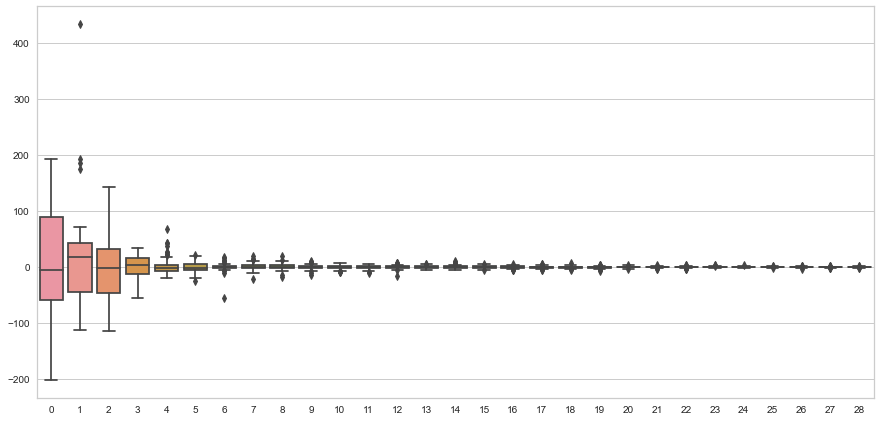

In [16]:
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = df_coordinates.iloc[:, 0:29], orient = 'v')

From avobe distribution plot and box plot we can see that there is outlier in this data.

### Correlation

In [17]:
corr_matrix = df_coordinates.corr(
    method = 'pearson',
    min_periods = 1  
)

corr_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,-0.041708,0.028695,-0.076057,0.013712,0.052373,0.016908,-0.046053,-0.037217,0.046748,...,-0.028925,0.030022,0.024708,-0.024955,0.002520,0.019881,-0.018560,0.057024,-0.025943,0.032286
1,-0.041708,1.000000,0.043172,-0.019783,0.008371,0.008966,-0.003308,-0.008855,-0.021718,0.012890,...,-0.005368,0.017089,-0.014384,0.001424,-0.012147,-0.012350,-0.004888,0.020379,-0.024367,-0.007079
2,0.028695,0.043172,1.000000,0.070564,-0.002763,0.002871,0.008408,-0.008806,0.090029,-0.030186,...,0.034596,-0.044028,0.031256,0.005013,-0.011213,0.048836,-0.000353,-0.022921,0.053242,0.035857
3,-0.076057,-0.019783,0.070564,1.000000,0.013192,0.027493,0.019275,-0.051065,-0.094024,0.023952,...,-0.051799,0.019674,-0.005013,-0.018987,-0.025383,-0.059759,0.001855,0.003891,0.005615,0.030173
4,0.013712,0.008371,-0.002763,0.013192,1.000000,-0.004260,-0.007232,0.025959,-0.002687,0.011894,...,0.018083,-0.010714,0.020395,0.015030,0.009955,0.014735,-0.003238,0.000607,-0.011486,-0.002767


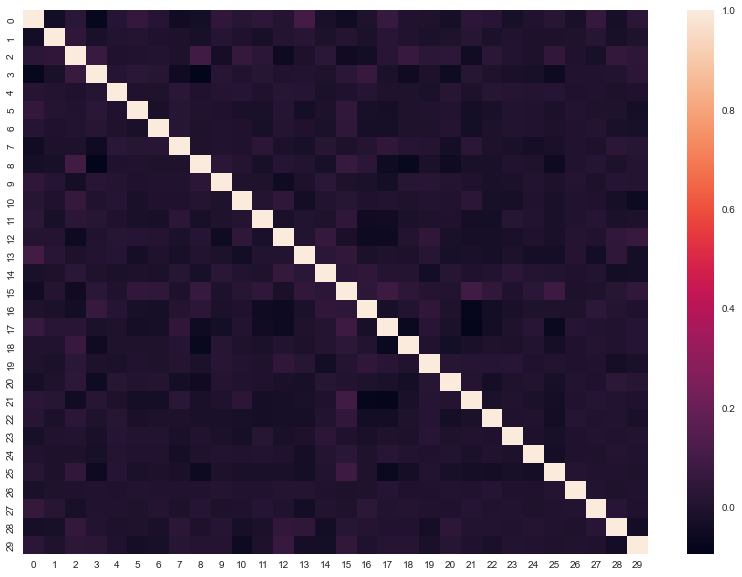

In [18]:
plt.subplots(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False)
plt.show()

The data seems to have almost no correlation, except the diagonal white line, which indicates the self-correlation.

In [19]:
def remove_outlier(df,columns,n_std):
    for col in columns:
        #print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

df_coordinates_clean = remove_outlier(df_coordinates,df_coordinates.columns, 2.5)

In [20]:
df_coordinates_clean

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,0.216411,...,-0.697783,-0.406979,0.607499,-1.309488,1.555190,-0.301822,-0.433051,0.037651,-0.279618,-0.421040
1,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,-1.451953,...,-0.105124,-0.569739,0.669346,-0.805954,1.583042,0.215340,-0.299550,0.709472,0.876382,-0.150133
2,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,0.601120,...,-0.546710,1.715016,1.269193,-0.397373,-0.813108,-0.481468,-0.243025,-0.537644,-0.140292,0.082158
3,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,-2.706925,...,-0.025537,0.972070,-0.066568,0.001964,0.656327,0.586941,-0.043639,-0.518699,-1.051100,0.542354
4,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,-2.626544,...,0.327166,-0.174675,0.368314,-0.700708,-0.450873,0.653851,0.718319,0.798722,-0.396749,0.844772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,-94.050832,-44.542377,91.023408,16.231518,1.952556,-7.227021,1.768435,-3.114095,-1.587100,-0.624771,...,1.775125,0.980304,-0.482541,-0.207674,0.278724,-0.178353,0.098691,-0.099439,-0.320591,0.272515
160,-91.085462,-46.160638,86.488654,16.969797,8.581993,-8.889106,3.806365,-2.572926,-1.852834,-0.197013,...,1.064458,1.526719,-1.573739,-0.523507,0.069268,0.360452,0.513323,0.043604,0.294724,-0.003514
161,-91.489354,-39.614165,87.430951,20.871706,11.444575,-6.707486,1.910320,-5.616304,-3.878495,-0.037360,...,-2.074445,-0.037273,-0.110737,0.018629,0.913451,-0.368755,-0.173323,-0.627292,0.092090,0.444992
163,-90.248202,-50.111180,77.285086,19.578454,5.634918,-13.863556,1.840409,-0.507864,-1.227452,0.595468,...,1.502094,1.749599,-0.235770,-0.484359,0.194612,0.125275,-0.018511,0.080169,-0.235063,0.317110


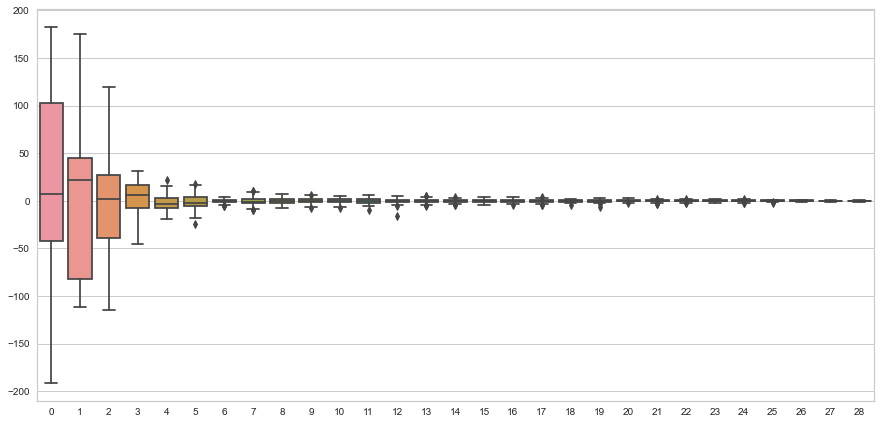

In [21]:
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = df_coordinates_clean.iloc[:, 0:29], orient = 'v')

After removing outliers we can see that there is no outliers present in dataset.

In [22]:
df_coordinates_clean.shape

(123, 30)

In [23]:
df_new = pd.concat([df_coordinates_clean, df_labels], axis=1, join='inner')
display(df_new)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Species
0,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,0.216411,...,-0.406979,0.607499,-1.309488,1.555190,-0.301822,-0.433051,0.037651,-0.279618,-0.421040,hosei
1,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,-1.451953,...,-0.569739,0.669346,-0.805954,1.583042,0.215340,-0.299550,0.709472,0.876382,-0.150133,hosei
2,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,0.601120,...,1.715016,1.269193,-0.397373,-0.813108,-0.481468,-0.243025,-0.537644,-0.140292,0.082158,rubicunda
3,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,-2.706925,...,0.972070,-0.066568,0.001964,0.656327,0.586941,-0.043639,-0.518699,-1.051100,0.542354,rubicunda
4,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,-2.626544,...,-0.174675,0.368314,-0.700708,-0.450873,0.653851,0.718319,0.798722,-0.396749,0.844772,rubicunda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,-94.050832,-44.542377,91.023408,16.231518,1.952556,-7.227021,1.768435,-3.114095,-1.587100,-0.624771,...,0.980304,-0.482541,-0.207674,0.278724,-0.178353,0.098691,-0.099439,-0.320591,0.272515,lar
160,-91.085462,-46.160638,86.488654,16.969797,8.581993,-8.889106,3.806365,-2.572926,-1.852834,-0.197013,...,1.526719,-1.573739,-0.523507,0.069268,0.360452,0.513323,0.043604,0.294724,-0.003514,lar
161,-91.489354,-39.614165,87.430951,20.871706,11.444575,-6.707486,1.910320,-5.616304,-3.878495,-0.037360,...,-0.037273,-0.110737,0.018629,0.913451,-0.368755,-0.173323,-0.627292,0.092090,0.444992,lar
163,-90.248202,-50.111180,77.285086,19.578454,5.634918,-13.863556,1.840409,-0.507864,-1.227452,0.595468,...,1.749599,-0.235770,-0.484359,0.194612,0.125275,-0.018511,0.080169,-0.235063,0.317110,lar


In [24]:
df_new.shape

(123, 31)

After removing outliers we can see that shape of data has changed 165 to 123.

In [25]:
print(len(df_new['Species'].value_counts()))
df_new['Species'].value_counts()

23


cristata        16
lar             15
mitis           10
polykomos       10
larvatus         9
badius           8
rubicunda        6
torquatus        6
troglodytes      5
hosei            5
fascicularis     5
albigena         5
talapoin         5
mulatta          3
anubis           3
gorilla          3
fuscata          2
patas            2
sylvanus         1
gelada           1
sphinx           1
syndactylus      1
paniscus         1
Name: Species, dtype: int64

After removing outliers number of species count has decreased to 23 from 25. Also we can see that there are few species where number of counts is very small, which might not be helpful for clustering. Therefore i will keep only those species whose count is 5 or higher.

In [26]:
counts = pd.DataFrame(df_new['Species'].value_counts()).reset_index()
counts


,index,Species
0,cristata,16
1,lar,15
2,mitis,10
3,polykomos,10
4,larvatus,9
5,badius,8
6,rubicunda,6
7,torquatus,6
8,troglodytes,5
9,hosei,5


In [27]:
less_counts = counts[counts['Species']<5]['index'].tolist()
less_counts


['mulatta',
 'anubis',
 'gorilla',
 'fuscata',
 'patas',
 'sylvanus',
 'gelada',
 'sphinx',
 'syndactylus',
 'paniscus']

In [28]:
df_new = df_new[~df_new['Species'].isin(less_counts)]

In [29]:
df_new.shape

(105, 31)

In [30]:
df_new['Species'].nunique()

13

After removing outliers and under represented species, now we have 105 samples left with 13 unique species.

In [31]:
print(df_new)

              0           1          2          3          4          5  \
0    133.426742 -101.627603  21.125902 -11.518251   4.621089  -1.519551   
1    145.344740 -108.229812  21.121390 -14.982879   2.299335  -2.354040   
2    137.773342 -107.162743  18.232497 -17.116294   3.016809  -5.295234   
3    141.523739 -107.436626  17.448083 -16.861469   3.382894  -1.071286   
4    142.357906  -97.195294  10.511391  -6.520641   3.555506   1.652390   
..          ...         ...        ...        ...        ...        ...   
159  -94.050832  -44.542377  91.023408  16.231518   1.952556  -7.227021   
160  -91.085462  -46.160638  86.488654  16.969797   8.581993  -8.889106   
161  -91.489354  -39.614165  87.430951  20.871706  11.444575  -6.707486   
163  -90.248202  -50.111180  77.285086  19.578454   5.634918 -13.863556   
164  -88.663448  -43.835382  74.681197  19.086880   9.755993  -9.499983   

            6         7         8         9  ...        21        22  \
0    0.583410 -7.182875  1.

In [32]:
print('The dimension of the DataFrame is: ', df_new.ndim)

The dimension of the DataFrame is:  2


In [33]:
skew_columns = (df_new.skew().sort_values(ascending=False))
print('skew')
print(skew_columns.head(10))
print('\n')

skew_columns_75 = skew_columns.loc[skew_columns > 0.75]
print('skew > 0.75')
print(skew_columns_75)
print('\n')

skew
5     0.380893
9     0.315103
19    0.303621
21    0.226097
2     0.207364
28    0.169996
8     0.126621
26    0.115087
23    0.070564
27    0.064172
dtype: float64


skew > 0.75
Series([], dtype: float64)




Species will not be used in training the model, as main aim of this assignment to make an unsupervised learning model. However, with Species labels, the accuracy of the model can be checked.

In [34]:
X = df_new[df_coordinates_clean.columns]
Y = df_new['Species']

In [35]:
from sklearn.preprocessing import StandardScaler

def normalize(X):
    scalar = StandardScaler()
    scalar = scalar.fit(X)
    X = scalar.transform(X)
    return pd.DataFrame(X)

X = normalize(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.065832,-1.390447,0.319675,-1.155375,1.109435,-0.159395,0.315721,-1.882424,0.632232,0.179077,...,-0.746262,-0.535231,0.667748,-1.710294,2.100825,-0.366035,-0.731552,0.092139,-0.754382,-1.202851
1,1.196280,-1.493648,0.319577,-1.395462,0.739329,-0.277939,0.213611,-1.308830,-0.273367,-0.662228,...,-0.197947,-0.720640,0.740048,-1.025517,2.137950,0.417876,-0.490980,1.494808,2.377583,-0.432454
2,1.113408,-1.476969,0.256897,-1.543301,0.853700,-0.695755,1.076115,-0.231659,-0.430879,0.373073,...,-0.606493,1.882064,1.441286,-0.469871,-1.055867,-0.638341,-0.389121,-1.108996,-0.376905,0.228126
3,1.154458,-1.481250,0.239878,-1.525642,0.912057,-0.095716,1.110997,-0.550892,-0.181427,-1.295073,...,-0.124315,1.035728,-0.120255,0.073204,0.902736,0.981147,-0.029822,-1.069441,-2.844569,1.536816
4,1.163588,-1.321164,0.089374,-0.809057,0.939573,0.291200,-0.515678,-1.340608,-0.286905,-1.254539,...,0.201998,-0.270599,0.388134,-0.882389,-0.573046,1.082569,1.343243,1.681149,-1.071727,2.396824


### Dimensionality Reduction with PCA

Before clustering the data, the dimensionality should be reduced. There are several techniques for this, but we will start with the most common one: PCA. 

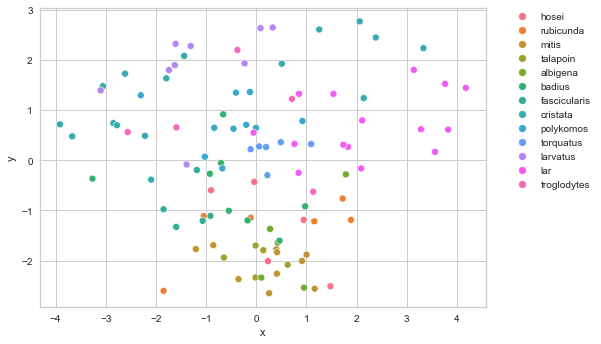

In [36]:
import matplotlib.pyplot as plt
def cluster(X, df):
    df['x'] = X[:,0]
    df['y'] = X[:,1]
    sns.scatterplot(x = 'x', y = 'y', hue = 'Species', data = df, alpha = 1, palette=sns.color_palette("husl", 13))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
principalComponents = pca.fit_transform(X)
cluster(principalComponents, df_new)

There is no clear separation between groups when looking at PC1 and PC2. Next, we check if tSNE can visually better separate the clusters. 

### Dimensionality reduction with t-SNE
t-SNE is a nonlinear dimensionality reduction technique that is well suited for embedding high dimension data into lower dimensional data (2D or 3D) for data visualization.
There are two parameters that can highly influence the results:

n_iter: The number of iterations that the algorithm runs</br>
perplexity: The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms.


In [37]:
from sklearn.manifold import TSNE


In [38]:
X_tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state = 42)
X_tsne = X_tsne.fit_transform(X)
X_tsne.shape

(105, 2)

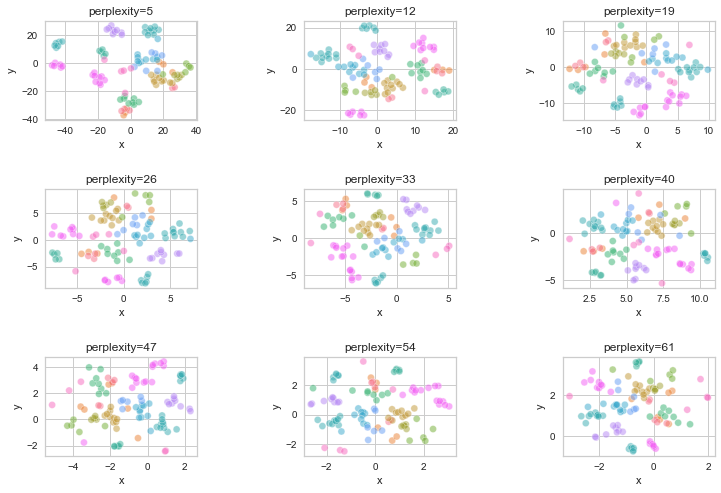

In [39]:
def sub_cluster(X, df):
    #add x, y features to the original df
    df['x'] = X[:,0]
    df['y'] = X[:,1]
    ax = sns.scatterplot(x = 'x', y = 'y', hue = 'Species', data = df, 
                        legend = False, alpha = 0.5, palette=sns.color_palette("husl", 13))
    return ax
p = list(range(5, 100, 7))
fig = plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.7, hspace=0.7)
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    X_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity = p[i], random_state = 42)
    X_tsne = X_tsne.fit_transform(X)
    sub_cluster(X_tsne, df_new)
    ax.set_title(f'perplexity={p[i]}')
plt.show()

Perplexity of 33 does give the best separation

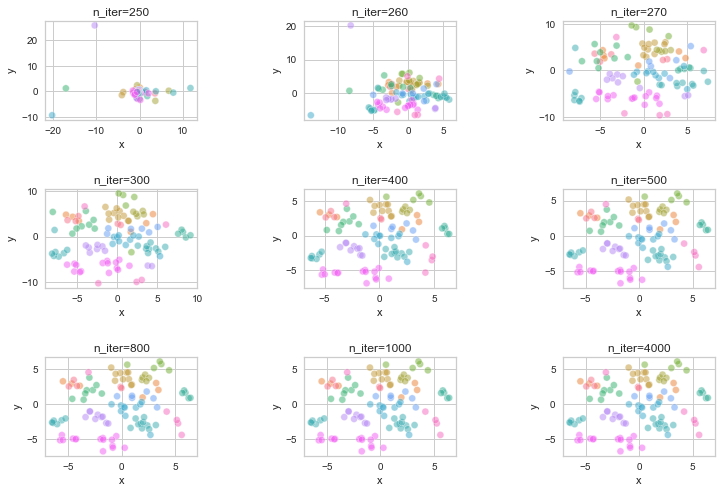

In [40]:
p = [250, 260, 270, 300, 400, 500, 800, 1000, 4000]
fig = plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.7, hspace=0.7)
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    X_tsne = TSNE(n_components=2, learning_rate='auto', init='random', 
                      perplexity = 33, 
                      random_state = 42, 
                      method = 'exact', #default method is "barnes hut", however for smaller datasets the "exact" method can be used.
                      n_iter = p[i])
    X_tsne = X_tsne.fit_transform(X)
    sub_cluster(X_tsne, df_new)
    ax.set_title(f'n_iter={p[i]}')
plt.show()

The best separation is reached at 400 iterations

In [41]:
X_tsne_opt = TSNE(n_components=2, learning_rate='auto', init='random', 
                      perplexity = 33, 
                      random_state = 42, 
                      method = 'exact',
                      n_iter = 400)
X_tsne_opt = X_tsne_opt.fit_transform(X)


In [42]:
def cluster(X, df):
    df['x'] = X[:,0]
    df['y'] = X[:,1]
    sns.scatterplot(x = 'x', y = 'y', hue = 'Species', data = df, alpha = 1, palette=sns.color_palette("husl", 13))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

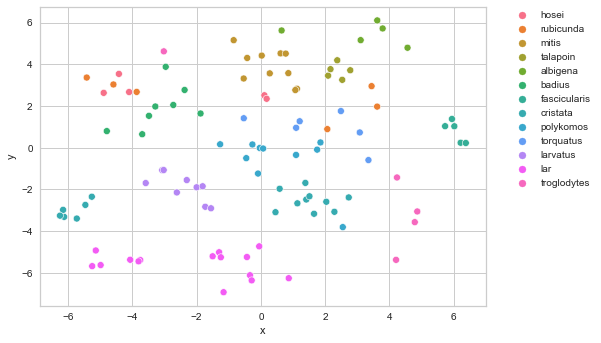

In [43]:
cluster(X_tsne_opt, df_new)

Clearly, the clusters appear to be getting more precise. Even though the majority of the data are in a well defined cluster, there are still some outliers.

## Model
### KMeans Clustering

Clustering is an unsupervised machine learning method that can identify groups of similar data points, known as clusters, from the data itself. For some clustering algorithms, such as K-means, one needs to know how many clusters there are beforehand. Unfortunately in many instances we do not know how many clusters there are in our data. There are three approaches to find the optimal number of clusters:

- The elbow method<br>
- The optimization of the silhouette coefficient<br>
- The gap statistic<br>

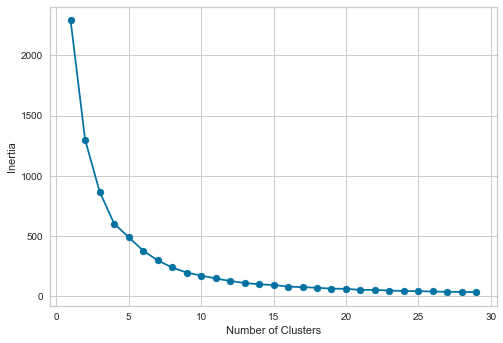

In [44]:
inertia = []
list_num_clusters = list(range(1,30))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X_tsne_opt)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

From avobe plot there is no visible elbow point to identify k value, for these reason I tried KElbowVisualizer to identify optimal K value.

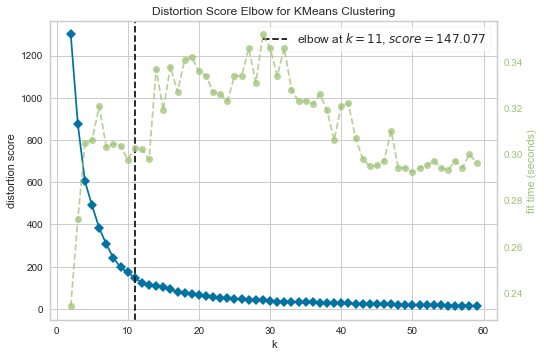

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
model = KMeans(init='random', n_clusters=list(range(2,13)), random_state=42)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,60))
visualizer.fit(X_tsne_opt)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

From above plot we can see that the data  which has been optimized by t_SNE has 11 clusters which is close to the number of unique species, which is 13. So, we can also say that 13 could also be number of cluster.

In [46]:
attributes = pd.DataFrame(X_tsne_opt)
kmeans = KMeans(init="random",n_clusters=13,n_init=10,max_iter=400,random_state=42).fit(attributes)
attributes['cluster'] = kmeans.predict(attributes)

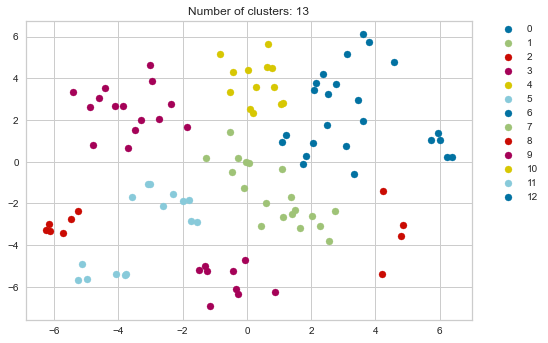

In [47]:
for i in np.unique(attributes['cluster']):
    plt.scatter(X_tsne_opt[attributes['cluster'] == i , 0] , X_tsne_opt[attributes['cluster'] == i , 1] , label = i)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Number of clusters: %d" % len(np.unique(attributes['cluster'])))
plt.show()

In [48]:
MDS_reduction = MDS(n_components=2, metric=True, n_init=10, max_iter=400, verbose=0, random_state=42)

mds = pd.DataFrame(MDS_reduction.fit_transform(attributes.drop('cluster',axis=1)),
             columns = ['PC1','PC2'])
mds['cluster'] = kmeans.predict(attributes.drop('cluster',axis=1))
mds['labels'] = pd.DataFrame(Y).values

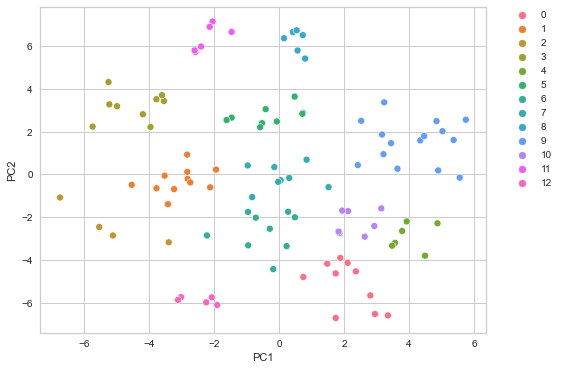

In [49]:
# plot the data using the number of clusters and actual labels
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=mds, x = "PC1", y="PC2", hue="cluster", palette=sns.color_palette("husl", 13))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

From above plot we can see that data clusterd nicely. 
Now we can evaluate the performance of this KMeans model using Adjusted Random Score, Homogeneity and Completeness metrics.
Init checks how clusters are selected during the initialization. There are only two parameters: 1. random 2. k-means++. We can evaluate the performance of this KMeans model by using this two init.

In [50]:
model_2 = KMeans(init="k-means++",n_clusters=13,n_init=10,max_iter=400,random_state=42)
mds_kmeans = model_2.fit_predict(mds[['PC1', 'PC2']])

print("Adjusted Random Score: %0.3f" % metrics.adjusted_rand_score(mds_kmeans, mds['labels']))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(mds_kmeans, mds['labels']))
print("Completeness: %0.3f" % metrics.completeness_score(mds_kmeans, mds['labels']))

Adjusted Random Score: 0.615
Homogeneity: 0.812
Completeness: 0.827


In [51]:
model_2 = KMeans(init="random",n_clusters=13,n_init=10,max_iter=400,random_state=42)
mds_kmeans = model_2.fit_predict(mds[['PC1', 'PC2']])

print("Adjusted Random Score: %0.3f" % metrics.adjusted_rand_score(mds_kmeans, mds['labels']))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(mds_kmeans, mds['labels']))
print("Completeness: %0.3f" % metrics.completeness_score(mds_kmeans, mds['labels']))

Adjusted Random Score: 0.571
Homogeneity: 0.800
Completeness: 0.811


'k-means++' performs better then 'random'.

## DBScan

DBSCAN is a popular density-based data clustering algorithm. To cluster data points, this algorithm separates the high-density regions of the data from the low-density areas. Unlike the K-Means algorithm, the best thing with this algorithm is that we don’t need to provide the number of clusters required prior.
The most important parameters are "eps" (distance to be considered neighbors and MinPts (minimum numer of neigbors, usually n+1, where n is number of dimensions).

Text(0.5, 0, 'Sorted observations')

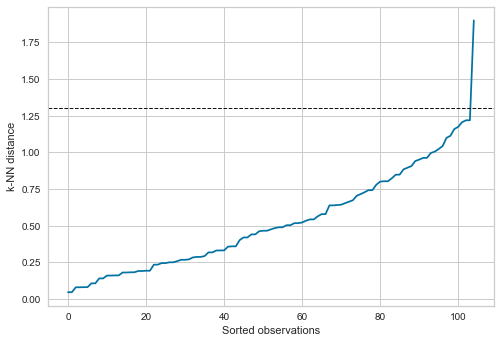

In [52]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_tsne_opt)
distances, indices = nbrs.kneighbors(X_tsne_opt)
# sort the neighbor distances (lengths to points) in ascending order
distances = np.sort(distances, axis=0)
sort_dist = distances[:,1]
plt.plot(sort_dist)
plt.axhline(y=1.3, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations")

From the above plot, we note the maximum curvature of the curve is about 1.25, and thus I picked value close to 1.30 as Eps.

In [53]:
db = DBSCAN(eps=1.30, min_samples=3).fit(X_tsne_opt)
db_labels = db.fit_predict(X_tsne_opt)
# db.labels_
db_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4, -1, -1, -1, -1,  1,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6], dtype=int64)

DBSCAN gives -1 for noise, which is an outlier, all the other values other than -1 is the cluster number or cluster group. 

In [54]:
n_clusters_=len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_clusters_
print('number of actual clusters without noise : ',n_clusters_)
print('number of noise : ', list(db.labels_).count(-1))

number of actual clusters without noise :  7
number of noise :  5


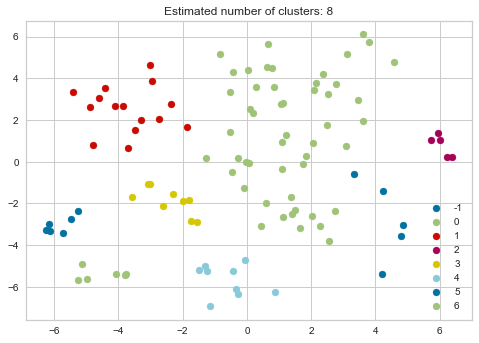

In [55]:
# Plot the clusters
for i in np.unique(db_labels):
    plt.scatter(X_tsne_opt[db_labels == i , 0] , X_tsne_opt[db_labels== i , 1], label = i)
plt.legend()
plt.title("Estimated number of clusters: %d" % len(np.unique(db_labels)))
plt.show() # showing the plot

In [56]:
print("Adjusted Random Score: %0.3f" % metrics.adjusted_rand_score(db_labels, df_new['Species']))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(db_labels, df_new['Species']))
print("Completeness: %0.3f" % metrics.completeness_score(db_labels, df_new['Species']))


Adjusted Random Score: 0.239
Homogeneity: 0.809
Completeness: 0.547


This algorithm most definitely isn't a suitable fit for this data, especially given the score of roughly 0.24.

### MeanShift

Choosing the correct bandwidth by hand might work for small data-sets but will be pretty hard as the data-set gets bigger and bigger. Therefore instead of selecting the bandwidth by hand, I'm using Scikit-Learn estimate_bandwidth wihich will automatically detect bandwidth.

In [57]:
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X_tsne_opt, quantile=0.1, n_samples=80)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_tsne_opt)
cluster_centers = ms.cluster_centers_

labels = ms.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 7


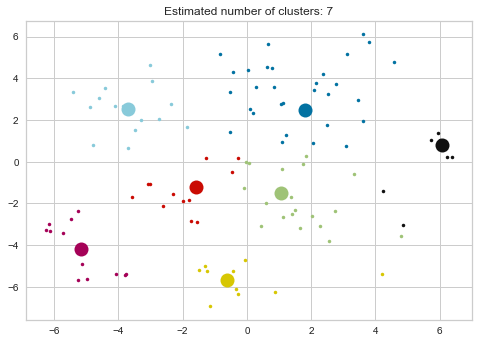

In [58]:
# Plot result
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X_tsne_opt[my_members, 0], X_tsne_opt[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [59]:
print('------------------Mean-Shift--------------------------')
print('Agglomerative Single-Link Clustering: %0.3f' % metrics.adjusted_rand_score( ms.labels_, df_new['Species']))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(ms.labels_, df_new['Species']))
print("Completeness: %0.3f" % metrics.completeness_score(ms.labels_, df_new['Species']))

------------------Mean-Shift--------------------------
Agglomerative Single-Link Clustering: 0.360
Homogeneity: 0.775
Completeness: 0.578


In [60]:
print('------------------KMeans--------------------------')
print("Adjusted Random Score: %0.3f" % metrics.adjusted_rand_score(mds_kmeans, mds['labels']))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(mds_kmeans, mds['labels']))
print("Completeness: %0.3f" % metrics.completeness_score(mds_kmeans, mds['labels']))

------------------KMeans--------------------------
Adjusted Random Score: 0.571
Homogeneity: 0.800
Completeness: 0.811


In [61]:
print('------------------DBScan--------------------------')
print("Adjusted Random Score: %0.3f" % metrics.adjusted_rand_score(db_labels, df_new['Species']))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(db_labels, df_new['Species']))
print("Completeness: %0.3f" % metrics.completeness_score(db_labels, df_new['Species']))

------------------DBScan--------------------------
Adjusted Random Score: 0.239
Homogeneity: 0.809
Completeness: 0.547


#### Conclusion

From sklearn.metrics.cluster module I use Adjusted Random Score, Homogeneity and Completeness metrics to evaluate the performance of KMeans, DBScan, Agglomerative Single-Link Clustering Algorithm and Mean-Shift clustering methods. From these score we can see that for Primates Morphology data KMeans clustering algorithm performs better. 
There are some misclassification happens also. One major problem was while training the model with this dataset was the very small number of samples. After removing the under-represented species helped the model to better distinguish the remaining groups. Keeping the misrepresented species just increased the noise in the dataset leading to less accurate clustering. After cleaning the data and training the model it is able to cluster the data and classifies the datapoints with an accuracy of 57%.
To improve this, the data could undergo even more filtering so no overlapping or split up clusters are present or different clustering finding methods could be used with finetuned parameters to get the best results.